## ROMS Glider

Position x time interpolation for ROMS files

In [1]:
%matplotlib inline
from okean.roms import glider
from okean import netcdf
import pylab as pl
import numpy as np

Lets use some ROMS-ESPRESSO output and load info from a glider:

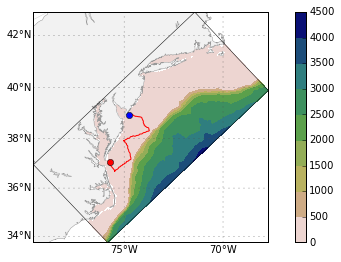

In [2]:
froms='http://tds.marine.rutgers.edu/thredds/dodsC/roms/espresso/2009_da/his'
fglider='http://tds.marine.rutgers.edu/thredds/dodsC/cool/glider/mab/Gridded/20101025T1600_marcoos_ru22_active.nc'

x=netcdf.use(fglider,'longitude')
y=netcdf.use(fglider,'latitude')
t=netcdf.nctime(fglider,'time')

a=glider.RomsGlider(froms,x,y,t)
a.plot(figsize=(5,4))

Extract and plot some variables:

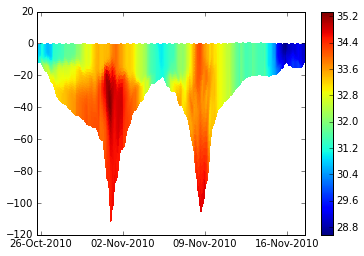

In [3]:
salt=a.extract('salt',method='fast')
z=a.depth('salt')
t2=np.tile(a.t[:,np.newaxis],(1,salt.shape[1]))

pl.pcolormesh(t2,z,salt)
pl.colorbar()

wk=pl.matplotlib.dates.WeekdayLocator()
fmt=pl.matplotlib.dates.DateFormatter('%d-%b-%Y')
ax=pl.gca()
ax.xaxis.set_major_locator(wk)
ax.xaxis.set_major_formatter(fmt)

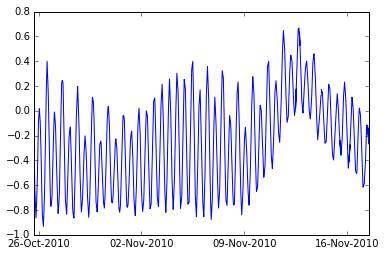

In [4]:
zeta=a.extract('zeta',quiet=1)
pl.plot(a.t,zeta)

ax=pl.gca()
ax.xaxis.set_major_locator(wk)
ax.xaxis.set_major_formatter(fmt)

Different data extraction methods:
- It is not possible to extract vectors from a >2d netcdf file, so data can be extracted for every needed cell, ie, one xyt point per data access, or the nd array including all the cells needed can be extracted. In the second case, the user can however split the proccess in time, resulting in more accesses, but less data extracted. The split can be linear in the time or user can choose the spltting time indices. Let's try the linear split with different number of accesses:

In [5]:
import time
t0=time.time()
a.extract('salt',method='fast',quiet=1) # one data access, more data extracted
print '%4.2f mn'%((time.time()-t0)/60.)
t0=time.time()
a.extract('salt',method='fast',nfast=5,quiet=1) # 5 data accesses, less data extracted
print '%4.2f mn'%((time.time()-t0)/60.)
t0=time.time()
a.extract('salt',method='fast',nfast=10,quiet=1) # 10 data accesses
print '%4.2f mn'%((time.time()-t0)/60.)
t0=time.time()
a.extract('salt',method='fast',nfast=20,quiet=1) # 20 data accesses
print '%4.2f mn'%((time.time()-t0)/60.)

0.85 mn
1.10 mn
1.18 mn
1.63 mn


- Using nonlinear data splitting (nfast as list) should be the fastest method and the one which extracts less data, but only if the right time indices are choosen. The perfect solution should be choosing time splitting based on cluster analysis, so that the number of accesses and the size of the data cubes extracted would be optimized. A simple example:

loading temp : ijt= 35 27 50 (t 4555 to 4604)
loading temp : ijt= 35 27 225 (t 4605 to 4829)


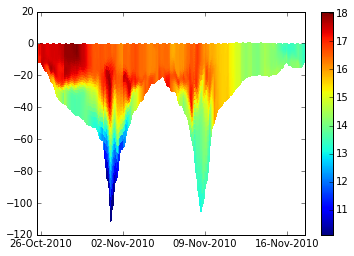

In [6]:
it0=a.uinds['r'][:,2].min()
it1=a.uinds['r'][:,2].max()+1
it=it0,it0+50,it1
temp=a.extract('temp',method='fast',nfast=it,quiet=0)
pl.pcolormesh(t2,z,temp)
pl.colorbar()

ax=pl.gca()
ax.xaxis.set_major_locator(wk)
ax.xaxis.set_major_formatter(fmt)